In [4]:
#Importing required libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import os
#os.getcwd()

In [5]:
#reading the stock market data set (S&P500)
df = pd.read_csv('sp500_data.csv')
#Changing the date column to datetime variable
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03 00:00:00+00:00,MMM,40.159910,40.342808,39.323788,39.454430,19.813830,2599386
1,2000-01-04 00:00:00+00:00,MMM,38.827340,39.637333,37.886707,37.886707,19.026537,3245705
2,2000-01-05 00:00:00+00:00,MMM,38.095737,40.238293,38.095737,38.984116,19.577652,4424482
3,2000-01-06 00:00:00+00:00,MMM,39.428303,42.851170,39.428303,42.119564,21.152254,7147057
4,2000-01-07 00:00:00+00:00,MMM,42.276337,43.399876,41.779892,42.955685,21.572147,4905035


In [7]:
#Wanted to see how many unique companies, 501 which is odd because S&P500
df['Ticker'].nunique()

501

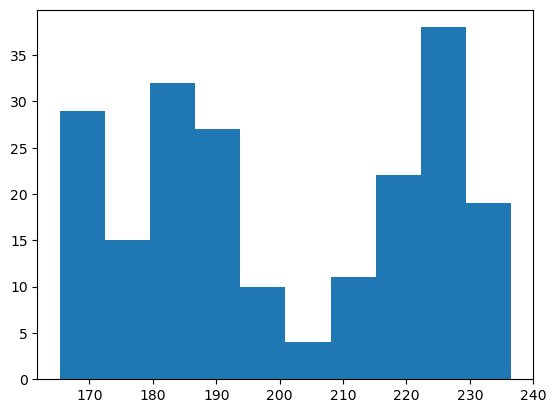

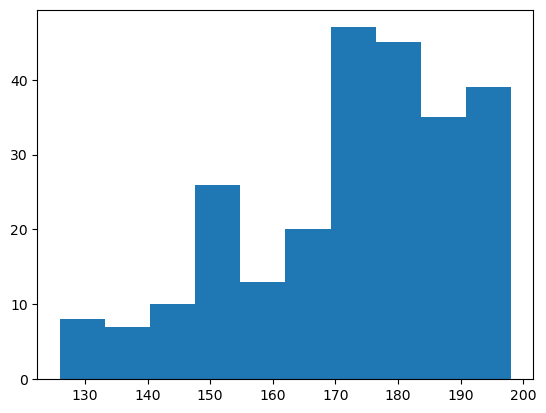

In [9]:
#Very basic histogram of stock prices of Apple in 2024 and then in 2023. Not a very informative graph.
plt.hist(df[(df['Ticker'] == 'AAPL') & (df['Date']>'2024-01-01')]['Open'])
plt.show()
plt.hist(df[(df['Ticker'] == 'AAPL') & (df['Date']>'2023-01-01') & (df['Date'] < '2024-01-01')]['Open'])
plt.show()

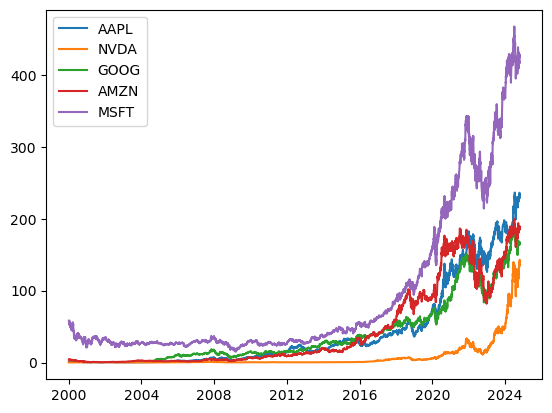

In [7]:
#Very convoluted way of graphing, sorry about that. Please try to understand what is happening in each argument and relevent subset.
#If unsure please ask me. I am graphing stock prices over time for some of the largest companies in S&P500
#Keep in mind, data starts from the year 2000!

plt.plot(df[df['Ticker'] == 'AAPL']['Date'], df[df['Ticker'] == 'AAPL']['Open'], label = 'AAPL')
plt.plot(df[df['Ticker'] == 'NVDA']['Date'], df[df['Ticker'] == 'NVDA']['Open'], label = 'NVDA')
plt.plot(df[df['Ticker'] == 'GOOG']['Date'], df[df['Ticker'] == 'GOOG']['Close'], label = 'GOOG')
plt.plot(df[df['Ticker'] == 'AMZN']['Date'], df[df['Ticker'] == 'AMZN']['Close'], label = 'AMZN')
plt.plot(df[df['Ticker'] == 'MSFT']['Date'], df[df['Ticker'] == 'MSFT']['Close'], label = 'MSFT')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.show()

In [13]:
#Here I'm just checking that it really is from 2000. As you can see 2000-01-03.
df['Date'].min()

Timestamp('2000-01-03 00:00:00+0000', tz='UTC')

In [19]:
#Reading in a list of all companies listed on stock exchanges with some general information on them
dfi = pd.read_csv('nasdaq_industry.csv')
dfi.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$130.19,-0.50,-0.383%,3.740719e+10,United States,1999.0,1248517,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$41.10,-0.92,-2.189%,1.061778e+10,United States,2016.0,3765135,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$1.01,0.00,0.00%,3.232013e+07,China,2008.0,34863,Real Estate,Other Consumer Services
3,AACT,Ares Acquisition Corporation II Class A Ordina...,$10.88,0.02,0.184%,0.000000e+00,NaN,2023.0,2142,Finance,Blank Checks
4,AADI,Aadi Bioscience Inc. Common Stock,$2.01,0.06,3.077%,4.947582e+07,United States,NaN,59816,Health Care,Biotechnology: Pharmaceutical Preparations


In [17]:
#Columns in data set
dfi.columns

Index(['Symbol', 'Name', 'Market Cap', 'Sector', 'Industry', 'IPO Year'], dtype='object')

In [22]:
#Keeping only the columns I may want to use
dfi = dfi[['Symbol','Name','Market Cap', 'Sector', 'Industry', 'IPO Year']]

In [23]:
#merging the data sets, if you see both datasets have the 'Ticker' and 'Symbol' column. I want to  add the above-
#columns to our first data set, so that each stock price has a bit more context.

#merge df and dfi, on the column Ticker for df and Symbol for dfi, using a left join which only matches dfi rows if it is in df.
merged_df = pd.merge(df, dfi, left_on='Ticker', right_on = 'Symbol', how='left')

In [29]:
#Checking for null values after the merge, 323 missing IPO Years, 2 missing industries, no missing sectors/name/market cap

merged_df[merged_df['Industry'].isnull()]['Ticker'].nunique()
merged_df[merged_df['IPO Year'].isnull()]['Ticker'].nunique()

2

In [33]:
#Here is what our new dataframe looks like
merged_df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Symbol,Name,Market Cap,Sector,Industry
0,2000-01-03 00:00:00+00:00,MMM,40.159910,40.342808,39.323788,39.454430,19.813830,2599386,MMM,3M Company Common Stock,6.793369e+10,Health Care,Medical/Dental Instruments
1,2000-01-04 00:00:00+00:00,MMM,38.827340,39.637333,37.886707,37.886707,19.026537,3245705,MMM,3M Company Common Stock,6.793369e+10,Health Care,Medical/Dental Instruments
2,2000-01-05 00:00:00+00:00,MMM,38.095737,40.238293,38.095737,38.984116,19.577652,4424482,MMM,3M Company Common Stock,6.793369e+10,Health Care,Medical/Dental Instruments
3,2000-01-06 00:00:00+00:00,MMM,39.428303,42.851170,39.428303,42.119564,21.152254,7147057,MMM,3M Company Common Stock,6.793369e+10,Health Care,Medical/Dental Instruments
4,2000-01-07 00:00:00+00:00,MMM,42.276337,43.399876,41.779892,42.955685,21.572147,4905035,MMM,3M Company Common Stock,6.793369e+10,Health Care,Medical/Dental Instruments


In [34]:
#How many different sectors are there
merged_df['Sector'].nunique()

11

In [35]:
#How many different Industries are there
merged_df['Industry'].nunique()

109

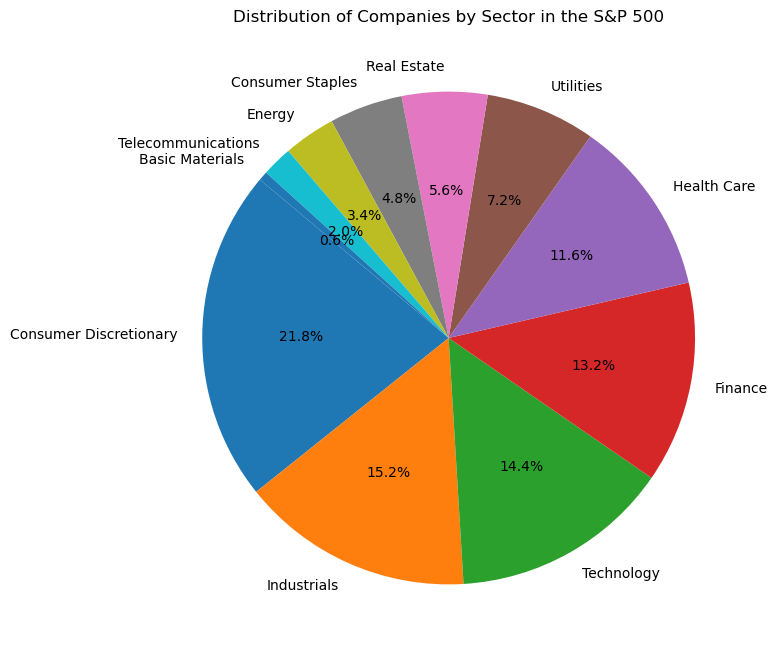

In [36]:
#Drop duplicate tickers/companies
unique_companies = merged_df.drop_duplicates(subset=['Ticker'])

# Count the number of companies in each sector
sector_counts = unique_companies['Sector'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies by Sector in the S&P 500')
plt.show()


### PIE CHART JUST FOR EDA

In [61]:
#Too many industries for a proper visualization, can notice these are much more specific than sectors.
industry_counts = unique_companies['Industry'].value_counts()
industry_counts[:20]

Industry
Real Estate Investment Trusts                 28
Industrial Machinery/Components               26
Computer Software: Prepackaged Software       19
Major Banks                                   17
Semiconductors                                16
Business Services                             15
Electric Utilities: Central                   15
Biotechnology: Pharmaceutical Preparations    12
Power Generation                              12
Medical/Dental Instruments                    11
Investment Bankers/Brokers/Service            11
Packaged Foods                                11
Property-Casualty Insurers                    11
Major Chemicals                               10
EDP Services                                   9
Oil & Gas Production                           9
Medical Specialities                           9
Integrated oil Companies                       7
Industrial Specialties                         7
Specialty Insurers                             6
Name: count